# Project Goal
### The main goal of this project is to understand the customers' satisfaction ratings to adopt the best marketing campaign.

# Exploratory Data Analysis (EDA)

Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations. We will know understand the steps of this process:

1. **Understand Column Meanings:** The first focus is on the available data that gives a lot of information. Begin by comprehending the meaning of each column and what each attribute represents and its significance in the analysis. This provides context for your data, which helps to understand and get valuable insights from them. 

2. **Check Data Integrity:** Ensure the integrity of your trains_df by inspecting for missing values (NaNs) and outliers. These are to be removed so that data contains only those values that are relevant and important from the target point of view. This will not only reduce time but also reduces the computational power from an estimation point of view. Addressing data quality issues is crucial to reliable analysis.

3. **Visualize Distributions:** Finding a correlation between variables helps to know how a particular variable is related to another. Utilize data visualization techniques to explore the distribution of individual variables. Tools like histograms, kernel density plots, and box plots can reveal insights into the data's spread and central tendencies.Statistical formulae applied for numerical outputs give fair information, but graphical visuals are more appealing and easier to interpret. 

4. **Pair Plots for Relationships:** Create pair plots to visualize relationships between pairs of variables. This matrix of scatter plots helps identify correlations and patterns, aiding in understanding the data's structure.

### Step 1: Understand the column meaning
We start by importing the proper libraries and load the trains_df

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler



import os
import requests

In [36]:
initial_trains_df= pd.read_csv("trains.csv", sep=',')

In [37]:
initial_trains_df.head()

,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Age,Departure Arrival Time Rating,Onboard WiFi Rating,Ticket ID,Checkin Rating,Track Location Rating,Baggage Handling Rating,...,Online Booking Rating,Satisfied,Onboard Entertainment Rating,Date and Time,Distance,Seat Comfort Rating,Work or Leisure,Departure Delay in Minutes,Onboard Service Rating,Cleanliness Rating
0,3,5,5,13,4,3,4718594,4,1,4,...,3,N,5,2016-02-19 10:53,460,5,leisure,25,4,5
1,5,4,1,25,2,3,1048580,1,3,3,...,3,N,1,2016-02-26 15:39,235,1,work,1,1,1
2,3,4,5,26,2,2,3670024,4,2,4,...,2,Y,5,2016-02-26 07:26,1142,5,work,0,4,5
3,5,4,2,25,5,2,3145737,1,5,3,...,5,N,2,2016-02-27 08:32,562,2,work,11,2,2
4,4,3,4,61,3,3,5767177,3,3,4,...,3,Y,3,2016-02-27 14:37,214,5,work,0,3,3


In [38]:
#IMP: Pup essere utile per capire le variabili categoriche e quelle numeriche
cat_cols= initial_trains_df.select_dtypes(include=['object']).columns
num_cols = initial_trains_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Ticket Class', 'Loyalty', 'Gender', 'Satisfied', 'Date and Time',
       'Work or Leisure'],
      dtype='object')
Numerical Variables:
['Legroom Service Rating', 'Onboard General Rating', "Food'n'Drink Rating", 'Age', 'Departure Arrival Time Rating', 'Onboard WiFi Rating', 'Ticket ID', 'Checkin Rating', 'Track Location Rating', 'Baggage Handling Rating', 'Arrival Delay in Minutes', 'Boarding Rating', 'Online Booking Rating', 'Onboard Entertainment Rating', 'Distance', 'Seat Comfort Rating', 'Departure Delay in Minutes', 'Onboard Service Rating', 'Cleanliness Rating']


## Dataset Features
In the Trains trains_df, each column represents a different feature of the train itself or related to the passengers. Let's get a deeper understanding of each feature: 

• **Satisfied**: whether the customer is satisfied, this is a binary variable, it can be either Yes or No;

• **Onboard General Rating**: rating from 0 to 5 about the service on board, therefore is a numerical variable; 

• **Work or Leisure**: was the travelling for work or leisure, it is a categorical variable and the possible outcomes are 'Work' or 'Leisure';

• **Baggage Handling Rating**: rating from 0 to 5 about the handling of the baggage, therefore is a numerical variable;

• **Age**: the age of the customer, therefore is a numerical variable, that can assume any number according to the age of that person; 

• **Cleanliness Rating**: rating from 0 to 5 about the cleanliness of the train, therefore is a numerical variable; 

• **Ticket Class**: the class of the ticket, ???

• **Loyalty**: if the customer is part of a loyalty programor not, it is a binary variable, it can be Yes or No;

• **Food'n'Drink Rating**: rating from 0 to 5 about the food and bevarages on board, therefore is a numerical variable; 

• **Gender**: whether male or female, it is a categorical variable denoted by M or F;

• **Online Booking Rating**: rating from 0 to 5 about the online booking experience, therefore is a numerical variable; 

• **Ticket ID**: unique ID assigned to the travel ticket, therefore is a numerical variable, it can be any number of 7 figures; 

• **Onboard Service Rating**: rating from 0 to 5 about the service onboard, therefore is a numerical variable; 

• **Legroom Service Rating**: rating from 0 to 5 about the space for the legs, therefore is a numerical variable; 

• **Arrival Delay in Minutes**: the delay on the arrival of the train, therefore is a numerical variable;

• **Departure Delay in Minutes**: the delay on the departure of the train, therefore is a numerical variable, it can assume any number; 

• **Checkin Rating**: rating from 0 to 5 about the checkin experience, therefore is a numerical variable; 

• **Onboard Entertainment Rating**: rating from 0 to 5 about the onboard entertainment experience, therefore is a numerical variable; 

• **Distance**: the distance of the specific travel, therefore is a numerical variable, it can assume any number;  

• **Boarding Rating**: rating from 0 to 5 about the boarding, therefore is a numerical variable; 

• **Onboard WiFi Rating**: rating from 0 to 5 about the WiFi service, therefore is a numerical variable; 

• **Date and Time**: the date and time of the travel, the date is presented as yyyy-mm-dd while the time as hh:mm;

• **Seat Comfort Rating**: rating from 0 to 5 about the comfort of the seating, therefore is a numerical variable; 

• **Track Location Rating**: rating from 0 to 5 about the track where the train has been boarded, therefore is a numerical variable; 

• **Departure Arrival Time Rating**: rating from 0 to 5 about the timing of the travel, therefore is a numerical variable; 

### Step 2: Check Data Integrity

In [39]:
# Check for missing values
missing_values = initial_trains_df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values Summary:")
print(missing_values)

Missing Values Summary:
Legroom Service Rating             0
Onboard General Rating             0
Food'n'Drink Rating                0
Age                                0
Departure Arrival Time Rating      0
Onboard WiFi Rating                0
Ticket ID                          0
Checkin Rating                     0
Track Location Rating              0
Baggage Handling Rating            0
Arrival Delay in Minutes         393
Ticket Class                       0
Loyalty                            0
Gender                             0
Boarding Rating                    0
Online Booking Rating              0
Satisfied                          0
Onboard Entertainment Rating       0
Date and Time                      0
Distance                           0
Seat Comfort Rating                0
Work or Leisure                    0
Departure Delay in Minutes         0
Onboard Service Rating             0
Cleanliness Rating                 0
dtype: int64


As showned by the code, the only feature containing missimg values is the 'Arrrival Delay in Minutes'. Since addressing missing data is crucial for ensuring the accuracy and reliability of insights drawn from a trains_df, understanding the nature of these missing values is essential. 
We decided to address this problem by exploiting the Python library **Missingno** is a valuable tool for visualizing and analyzing missing data within your trains_dfs. It offers several visualizations and tools to gain insights into the presence of missing values, including:

- **Matrix Plot:** A matrix plot provides a visual representation of missing values in the trains_df, allowing you to identify patterns and areas with high or low missingness.

 Missingno aids in data cleaning by highlighting columns with excessive missing values that may need to be removed or imputed.

In [40]:
import missingno as msno

<AxesSubplot:>

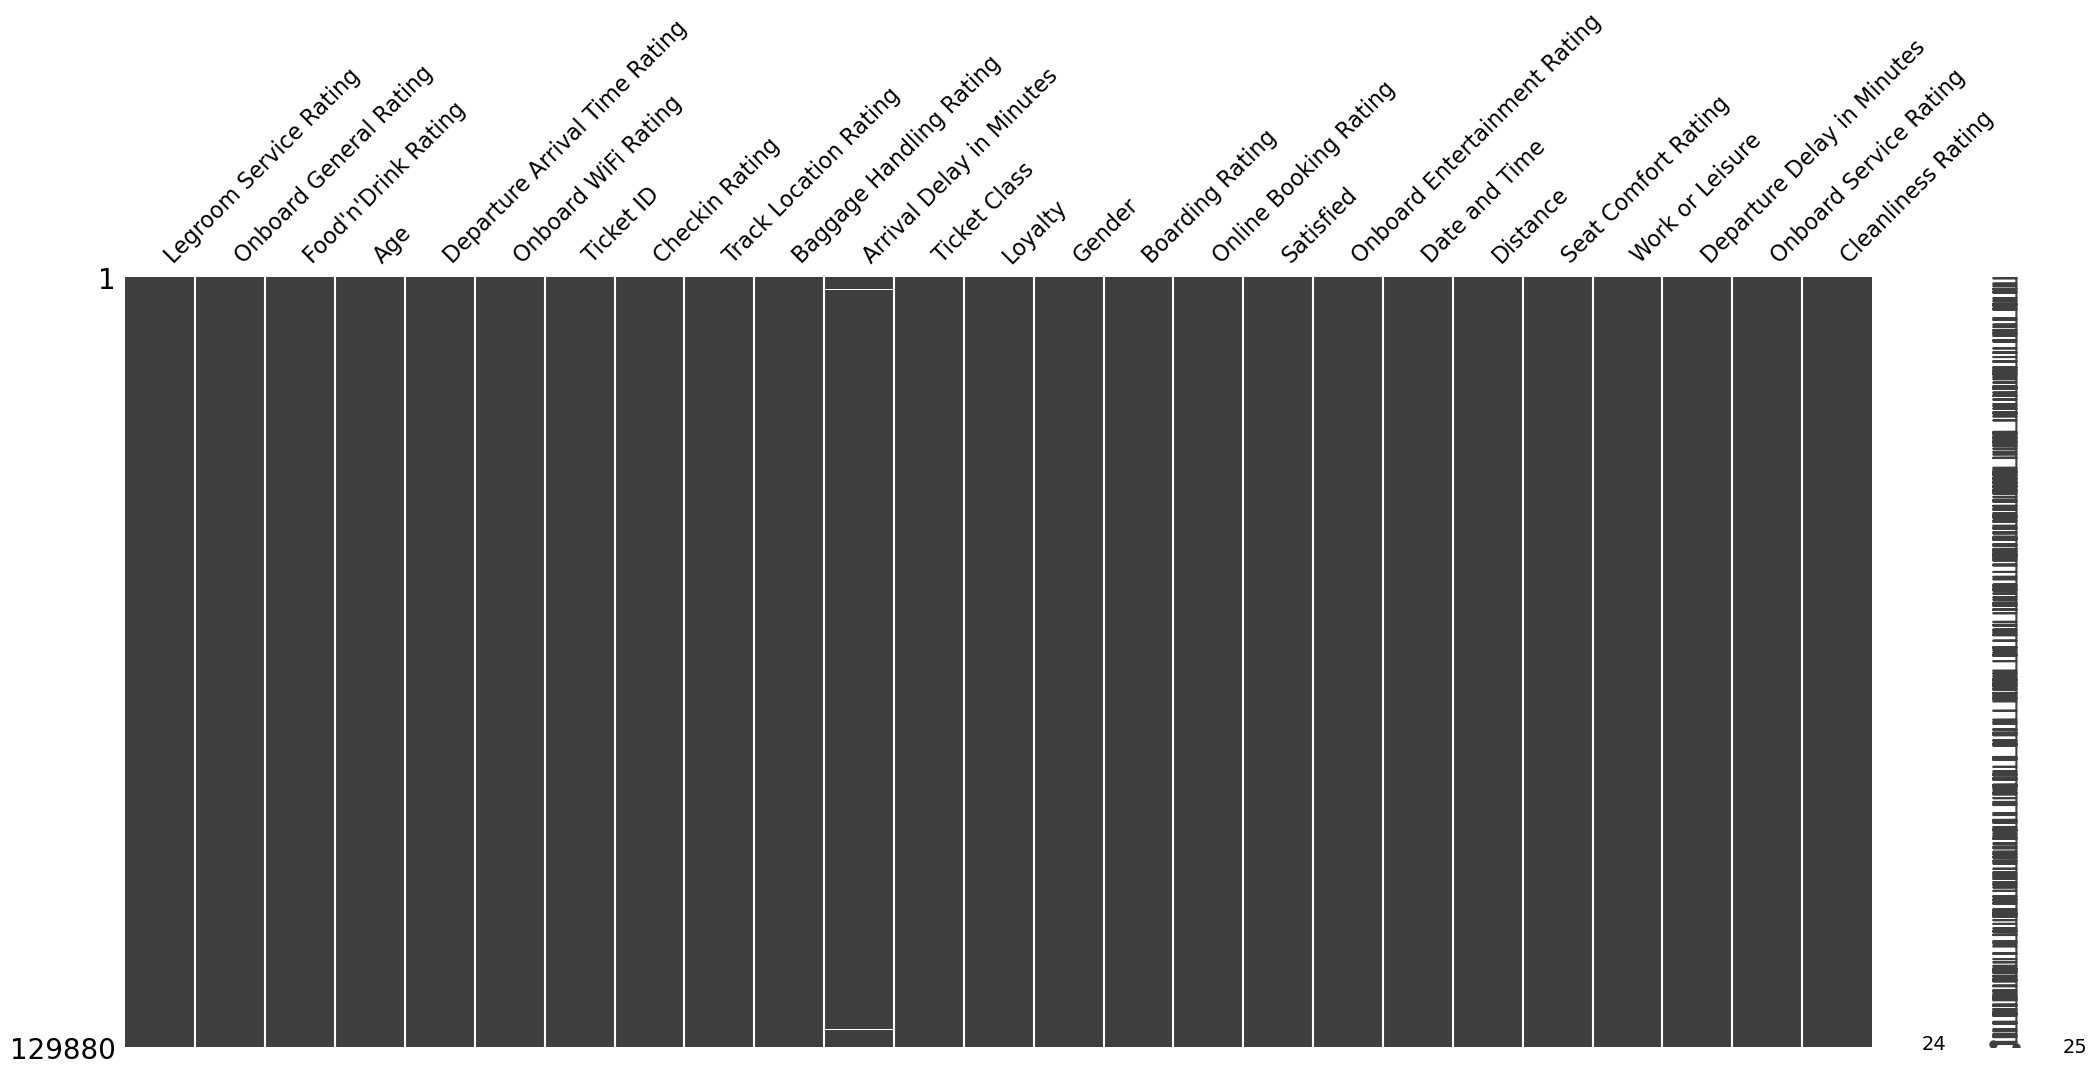

In [41]:
# matrix plot
msno.matrix(initial_trains_df)

The matrix shows us that the magnitude of the missing values of the 'Arrival Delay in Minutes' is negligible since there are only 396 missing values out of 129880. In order to highlight this consideration we proceed to further compute the percentage of the missing values. 

In [42]:
# Creating a DataFrame for missing values count and percentage
missing_value_df = pd.DataFrame({
    'Missing Values': initial_trains_df.isnull().sum(),
    'Percentage of Total (%)': (initial_trains_df.isnull().sum() / len(initial_trains_df)) * 100
})

# Filter out columns that don't have any missing values 
missing_value_df = missing_value_df[missing_value_df['Missing Values'] > 0]

missing_value_df



,Missing Values,Percentage of Total (%)
Arrival Delay in Minutes,393,0.302587


Taking into account our previous consideration, we decided to proceed by dropping the rows corresponding to the missing values of 'Arrival Delay in Minutes', because of the marginal importance of the missing values considering the whole trains_df.

In [43]:
#Drop rows with missing 'Arrival Delay in Minutes' values
trains_df = initial_trains_df.dropna(subset=['Arrival Delay in Minutes'])

# Calculate the number of rows dropped
rows_dropped = len(initial_trains_df) - len(trains_df)

# Print the number of rows dropped
print(f"Number of Rows Dropped: {rows_dropped}")


# Check if there are any NaN values in the dataset
if trains_df.isnull().any().any():
    print("The dataset contains NaN values")
else:
    print("The dataset does not contain any NaN values")

# Get the count of NaN values in each column
nan_counts = trains_df.isnull().sum()

# Print the counts
print(nan_counts)

Number of Rows Dropped: 393
The dataset does not contain any NaN values
Legroom Service Rating           0
Onboard General Rating           0
Food'n'Drink Rating              0
Age                              0
Departure Arrival Time Rating    0
Onboard WiFi Rating              0
Ticket ID                        0
Checkin Rating                   0
Track Location Rating            0
Baggage Handling Rating          0
Arrival Delay in Minutes         0
Ticket Class                     0
Loyalty                          0
Gender                           0
Boarding Rating                  0
Online Booking Rating            0
Satisfied                        0
Onboard Entertainment Rating     0
Date and Time                    0
Distance                         0
Seat Comfort Rating              0
Work or Leisure                  0
Departure Delay in Minutes       0
Onboard Service Rating           0
Cleanliness Rating               0
dtype: int64


**decidiamo che fa**

Handling missing values - Imputing with median ???

dataset['Arrival Delay in Minutes'].fillna(dataset['Arrival Delay in Minutes'].median(), inplace=True)

## Step 3: Visualize distributions

## Pairplots for Relationships
Pairplots, also known as pairwise scatter plots or scatterplot matrices, are important in Exploratory Data Analysis (EDA) for several reasons:

1. **Visualization of Relationships**: Pairplots allow you to visualize the relationships between pairs of variables in your trains_df. By plotting each pair of variables against each other, you can quickly identify patterns, trends, and potential correlations. This visual inspection can reveal both linear and non-linear relationships between variables.

2. **Identifying Outliers**: Pairplots can help in identifying outliers or anomalies in the data. Outliers may appear as data points that fall far from the main cluster of points in the scatterplots. Identifying outliers is crucial because they can significantly impact statistical analyses and machine learning models.

3. **Multivariate Analysis**: EDA often involves examining the interactions between multiple variables simultaneously. Pairplots provide a comprehensive view of these interactions, making it easier to assess how different variables relate to one another in a multivariate context.

4. **Feature Selection**: When dealing with a large number of features (variables), pairplots can aid in feature selection. You can use them to visually identify which pairs of variables show strong relationships or dependencies, which may guide you in selecting a subset of the most relevant features for further analysis or modeling.

5. **Diagnosing Collinearity**: Collinearity is a situation where two or more variables in your trains_df are highly correlated with each other. Pairplots can help you diagnose collinearity by showing if there are strong linear relationships between pairs of variables. Identifying collinearity is important because it can lead to instability in regression models and make it challenging to interpret the importance of individual predictors.

6. **Data Quality Assessment**: Pairplots can reveal data quality issues such as missing values or data entry errors. If you see unusual patterns or gaps in the scatterplots, it may indicate problems with the data that need to be addressed.

7. **Hypothesis Generation**: Pairplots can serve as a starting point for generating hypotheses about your data. When you observe interesting patterns or relationships in the pairplots, you can formulate hypotheses to be tested in subsequent analyses.

8. **Communication**: Pairplots are a useful tool for communicating insights about your data to others, including team members, stakeholders, or non-technical audiences. Visualizations often make it easier for people to grasp complex relationships in the data.

Because of the size and dimension of the trains_df we cannot use all methods provided in the lessons, therefore we decided to use as viualization and distribution methods: 
- the **heatmap**, in order to understand the correlation;
- the **countplots**, to identify dominant categories and detecting any imbalances or variations in the data.


In [44]:
# Date and Time conversion: they are translated in objects datatime
trains_df['Date and Time'] = pd.to_datetime(trains_df['Date and Time'])

# Extracting new features from 'Date and Time' 
trains_df['Weekday'] = trains_df['Date and Time'].dt.day_name()
trains_df['Month'] = trains_df['Date and Time'].dt.month_name()
trains_df['Hour'] = trains_df['Date and Time'].dt.hour


/var/folders/k7/jkh44w1n4jg6nfphrrdf1p380000gn/T/ipykernel_10610/3686505139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trains_df['Date and Time'] = pd.to_datetime(trains_df['Date and Time'])
/var/folders/k7/jkh44w1n4jg6nfphrrdf1p380000gn/T/ipykernel_10610/3686505139.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trains_df['Weekday'] = trains_df['Date and Time'].dt.day_name()
/var/folders/k7/jkh44w1n4jg6nfphrrdf1p380000gn/T/ipykernel_10610/3686505139.py:6: SettingWithCopyWarning: 
A value is tr

**COUNTPLOTS** 

Countplots in Seaborn are used to visualize the frequency of categorical data, using seaborn.countplot() we get the display of the counts of observations in each categorical bin using bars. They pave a clear path towards grasping the distribution and relative frequencies of various categories within a trains_df.  
Especially potent in exploring and comparing categorical data, countplots assist in identifying dominant categories and detecting any imbalances or variations in the data. Countplots provide a rapid and intuitive glimpse into the most common categories and detect rare or infrequent ones in a trains_df, through the visualization of each category’s counts as vertical bars or columns.

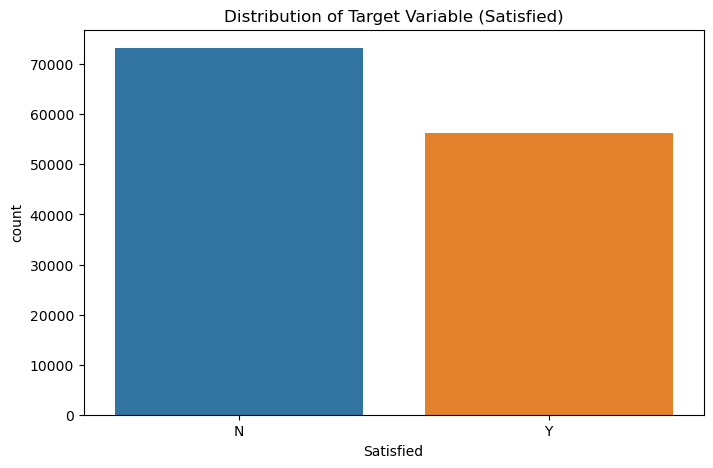

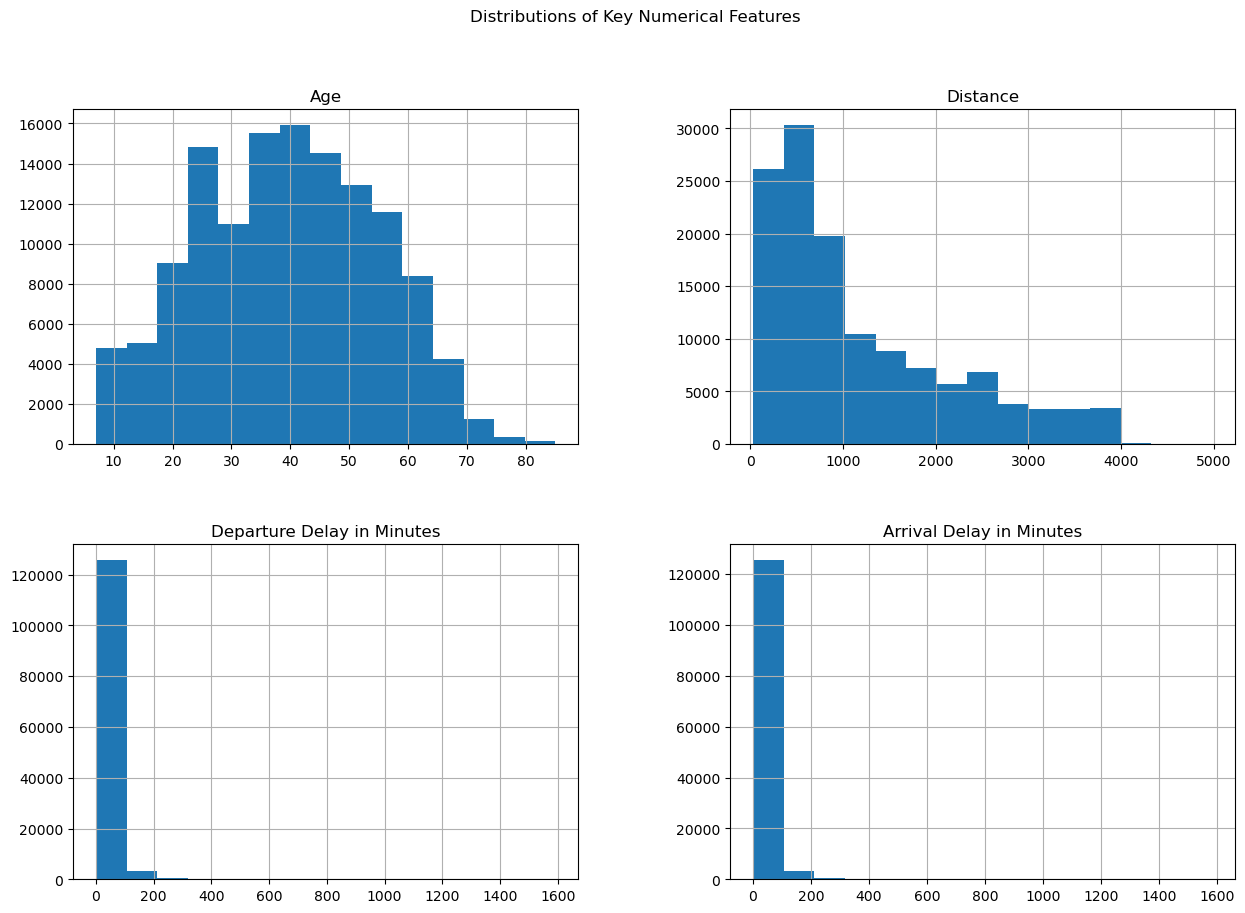

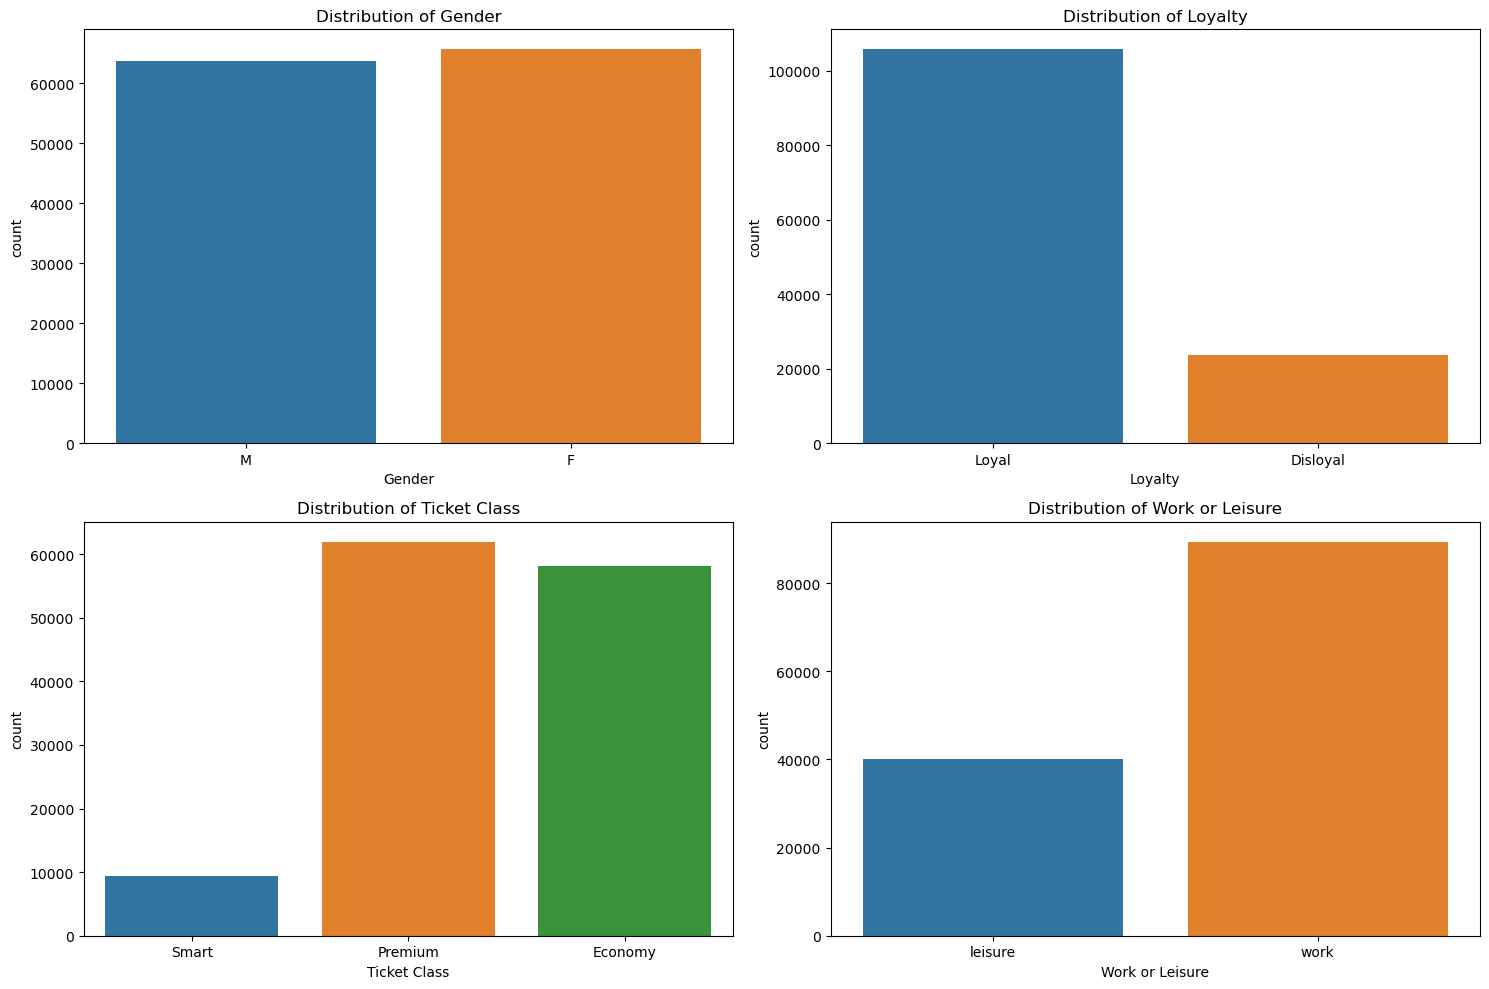

In [45]:

# Analyzing the distribution of the target variable 'Satisfied'
plt.figure(figsize=(8, 5))
sns.countplot(x='Satisfied', data=trains_df)
plt.title('Distribution of Target Variable (Satisfied)')
plt.show()

# Exploring some key numerical features
numerical_features = ['Age', 'Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
trains_df[numerical_features].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distributions of Key Numerical Features')
plt.show()

# For categorical features, let's select a few to visualize
categorical_features = ['Gender', 'Loyalty', 'Ticket Class', 'Work or Leisure']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, cat in enumerate(categorical_features):
    row, col = i // 2, i % 2
    sns.countplot(x=cat, data=trains_df, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {cat}')
plt.tight_layout()
plt.show()

In [46]:
# Calculating the distribution of the 'Satisfied' class
class_distribution = trains_df['Satisfied'].value_counts(normalize=True) * 100

# Convert the Series to a DataFrame and print it
class_distribution_df = class_distribution.to_frame().reset_index()
class_distribution_df.columns = ['Satisfied', 'Percentage']

# Print the DataFrame without the index
print(class_distribution_df.to_string(index=False))


Satisfied  Percentage
        N   56.550078
        Y   43.449922


**HEATMAP**

**Definition:**
A heatmap (or heat map) is a graphical representation of data where values are depicted by color. The axis variables are divided into ranges like a bar chart or histogram, and each cell’s color indicates the value of the main variable in the corresponding cell range. Each cell reports a numeric count, like in a standard data table, but the count is accompanied by a color, with larger counts associated with darker colorings.

**Usage:**
Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables. Because of their reliance on color to communicate values, Heat Maps are perhaps most commonly used to display a more generalized view of numeric values. This is especially true when dealing with large volumes of data, as colors are easier to distinguish and make sense of than raw numbers. 
The variables plotted on each axis can be of any type, whether they take on categorical labels or numeric values. In the latter case, the numeric value must be binned like in a histogram in order to form the grid cells where colors associated with the main variable of interest will be plotted.
Heat Maps are extremely versatile and efficient in drawing attention to trends, exploiting their ability to rapidly communicate key data insights to the viewer is greatly enhanced. That is why is particularly useful in our project.

 Heatmaps are useful to product teams, marketers etc., by aggregating user behavior, heatmaps facilitate data analysis, combining quantitative and qualitative data, and give a snapshot understanding of how your target audience interacts .

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

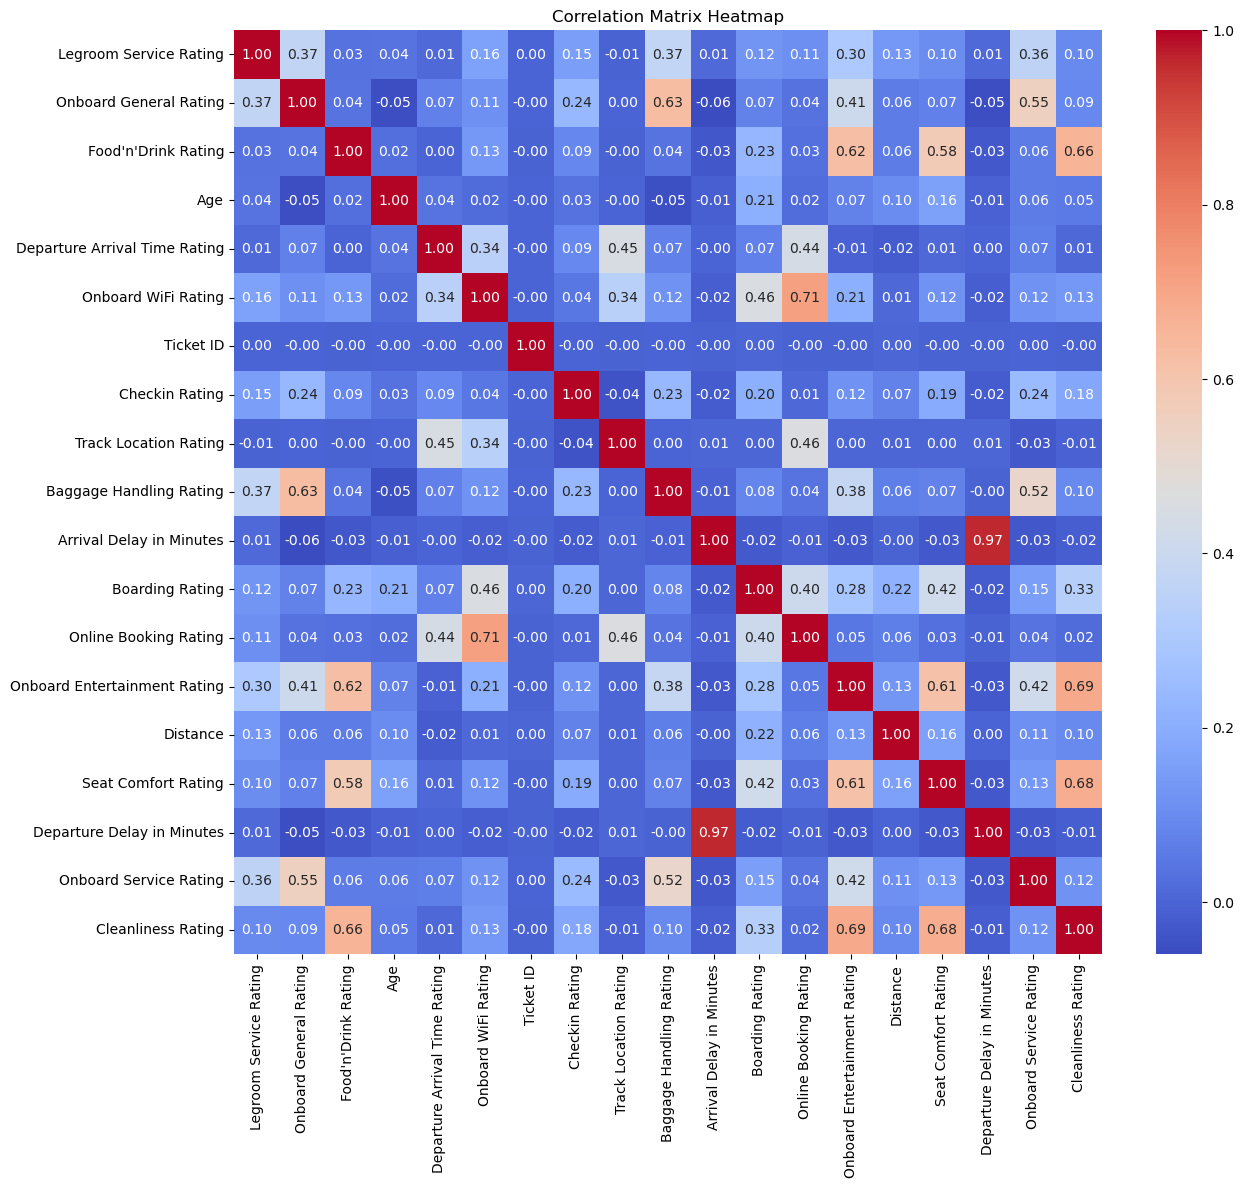

In [47]:
# Plotting the correlation matrix as a heatmap
# Correlation analysis, later used for heatmap
correlation_matrix = trains_df[num_cols].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")

The data  have various features that can influence customer satisfaction, such as service ratings, travel conditions, etc. The most important ratings, having the highest correlation in the heatmap, meaning above teh threshold of 0.5, are all the variables regarding the rating.


**Defined Target Variable**: Your trains_df includes a specific target variable ('Satisfied'), representing whether customers are satisfied or not. This binary classification (satisfied/unsatisfied) directly corresponds to the goal of predicting customer satisfaction.

**Supporting Marketing and Retention Strategies**: By accurately classifying customers based on their satisfaction, the company can tailor its marketing efforts more effectively. For example:

- **Satisfied customers** can be targeted with loyalty programs or upselling opportunities.

- **Unsatisfied customers** can be approached with remedial measures, discounts, or personalized offers to improve their satisfaction and retain them.

**Insights**:
- The target variable 'Satisfied' seems to have a relatively balanced distribution, which is good for model training.

- Numerical features show varying distributions, with some skewness observable in features like 'Departure Delay in Minutes' and 'Arrival Delay in Minutes'.

- Categorical features display varied distributions, which could influence the satisfaction levels.


**boh utile??**

Here are the visualizations from the Exploratory Data Analysis (EDA): 

Distribution of Target Variable ('Satisfied'): The plot shows the distribution of customers based on whether they are satisfied or not. This gives an idea of the balance or imbalance in the trains_df regarding the target variable.

Numerical Feature Distributions: Histograms for key numerical features like 'Age', 'Distance', 'Departure Delay in Minutes', and 'Arrival Delay in Minutes' provide insights into their spread and skewness. These distributions can inform the necessity for transformations or outlier handling.

Categorical Feature Distributions: The distributions of categorical features like 'Gender', 'Loyalty', 'Ticket Class', and 'Work or Leisure' help in understanding the composition of these variables in the trains_df.

Correlation Analysis: The heatmap illustrates the correlations between different features. This can highlight potential predictors for customer satisfaction and also indicate multicollinearity among features.


Next Steps in Preprocessing:
Handle Missing Values: Decide on a strategy for the missing values in 'Arrival Delay in Minutes'.
Outlier Detection and Removal: Based on the distribution of numerical features, investigate and handle outliers.
One-Hot Encoding for Categorical Variables: Convert categorical variables into a format that can be provided to ML models.
Feature Scaling: Scale the numerical features to ensure consistent range across all variables.

SPLIT TRAIN AND TEST DATA IN ORDER TO DO THE PREPROCESSING


In [48]:
# Separate the features and the target variable
X = trains_df.drop(['Satisfied'], axis=1)
y = trains_df['Satisfied']
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [49]:
def preprocess_train_data(X):
    # Get the categorical columns
    cat_cols_train = X_train.select_dtypes(include=['object', 'bool']).columns

    # Apply the OneHotEncoder
    encoder = OneHotEncoder()
    cat_cols_train_out = encoder.fit_transform(X_train[cat_cols_train])

    # Convert the sparse matrix to a dense array
    cat_col_train_out_array = cat_cols_train_out.toarray()

    # Convert the array to a DataFrame
    enc_cat_col_train_df = pd.DataFrame(cat_col_train_out_array, columns=encoder.get_feature_names_out(input_features=cat_cols_train))

    # Reset index
    enc_cat_col_train_df = enc_cat_col_train_df.reset_index(drop=True)

    # Get the numerical columns
    num_cols_train = X_train.select_dtypes(include=['int64', 'float64']).columns

    # Apply the StandardScaler
    scaler = StandardScaler()
    scaled_num_train_cols = scaler.fit_transform(X_train[num_cols_train])

    # Convert the array to a DataFrame
    scaled_num_cols_train_df = pd.DataFrame(scaled_num_train_cols, columns=num_cols_train)

    # Reset index
    scaled_num_cols_train_df = scaled_num_cols_train_df.reset_index(drop=True)

    # Concatenate the DataFrames
    X_final = pd.concat([enc_cat_col_train_df, scaled_num_cols_train_df], axis=1)

    return X_final

In [50]:
def preprocess_test_data(X_test):
    # Get the categorical columns
    cat_cols_test = X_test.select_dtypes(include=['object', 'bool']).columns

    # Apply the OneHotEncoder
    encoder = OneHotEncoder()
    cat_cols_test_out = encoder.fit_transform(X_test[cat_cols_test])

    # Convert the sparse matrix to a dense array
    cat_col_test_out_array = cat_cols_test_out.toarray()

    # Convert the array to a DataFrame
    enc_cat_col_test_df = pd.DataFrame(cat_col_test_out_array, columns=encoder.get_feature_names_out(input_features=cat_cols_test))

    # Reset index
    enc_cat_col_test_df = enc_cat_col_test_df.reset_index(drop=True)

    # Apply the StandardScaler
    scaler = StandardScaler()
    num_cols_test = X_test.select_dtypes(include=['int64', 'float64']).columns

    # Transform the numerical columns using the fitted StandardScaler
    scaled_num_test_cols = scaler.fit_transform(X_test[num_cols_test])

    # Convert the array to a DataFrame
    scaled_num_cols_test_df = pd.DataFrame(scaled_num_test_cols, columns=num_cols_test)

    # Reset index
    scaled_num_cols_test_df = scaled_num_cols_test_df.reset_index(drop=True)

    # Concatenate the DataFrames
    X_final = pd.concat([enc_cat_col_test_df, scaled_num_cols_test_df], axis=1)

    return X_final

In [51]:
X_train_final = preprocess_train_data(X_train)
X_test_final = preprocess_test_data(X_test)

X_test_final.head()

,Ticket Class_Economy,Ticket Class_Premium,Ticket Class_Smart,Loyalty_Disloyal,Loyalty_Loyal,Gender_F,Gender_M,Work or Leisure_leisure,Work or Leisure_work,Weekday_Friday,...,Arrival Delay in Minutes,Boarding Rating,Online Booking Rating,Onboard Entertainment Rating,Distance,Seat Comfort Rating,Departure Delay in Minutes,Onboard Service Rating,Cleanliness Rating,Hour
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,-0.382013,0.556201,-1.251579,0.478354,0.401691,1.178512,-0.176485,0.475902,0.540511,-0.343776
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,-0.382013,-0.181209,0.176931,-0.270197,-0.252454,-0.335288,-0.374929,1.251353,-0.219156,-1.219697
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,-0.382013,-0.918619,-0.537324,1.226906,-0.520744,1.178512,-0.374929,1.251353,1.300178,-0.927724
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,-0.382013,0.556201,-1.251579,0.478354,0.647874,0.421612,-0.374929,0.475902,1.300178,-0.635750
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,-0.382013,-0.918619,-0.537324,-0.270197,0.960377,-1.092188,-0.374929,-0.299550,-0.219156,0.824119


In [52]:
# Create a DataFrame to display the shapes
shapes_df = pd.DataFrame({
    'Dataset': ['X_train', 'y_train', 'X_test', 'y_test'],
    'Shape': [X_train_final.shape, y_train.shape, X_test_final.shape, y_test.shape]
}).style.hide(axis='index')

# Display the DataFrame
shapes_df

Dataset,Shape
X_train,"(97115, 38)"
y_train,"(97115,)"
X_test,"(32372, 38)"
y_test,"(32372,)"


## **PREPROCESSING**


Preprocessing is the process of preparing raw data for machine learning. It is an essential step in any machine learning project, as it can help to improve the performance and accuracy of your model. Data Preprocessing includes the steps we need to follow to transform or encode data so that it may be easily parsed by the machine. 

The goal of preprocessing is to transform the raw data into a format that is more suitable for machine learning algorithms. This may involve cleaning the data, handling missing values, encoding categorical features, and scaling numerical features.The majority of the real-world datasets for machine learning are highly susceptible to be missing, inconsistent, and noisy due to their heterogeneous origin. 
Applying data mining algorithms on this noisy data would not give quality results as they would fail to identify patterns effectively. Data Processing is, therefore, important to improve the overall data quality.

- Duplicate or missing values may give an incorrect view of the overall statistics of data.

- Outliers and inconsistent data points often tend to disturb the model’s overall learning, leading to false predictions.

### Preprocessing with Scikit Learn 

Scikit-learn is a popular Python library for machine learning. It provides a variety of preprocessing tools that can be used to prepare data for machine learning.

1. **Cleaning the data**: This may involve removing outliers, correcting errors, and filling in missing values.

2. **Handling missing values**: There are a number of ways to handle missing values, such as dropping the samples with missing values meaning ignore those tuples, this method should be considered when the dataset is huge, imputing the missing values with a mean or median value, or using a more sophisticated imputation method such as k-nearest neighbors.

3. **Encoding categorical features**: Sometimes, data is in a format that can’t be processed by machines. For instance, a column with string values, like names, will mean nothing to a model that depends only on numbers. So, we need to process the data to help the model interpret it. This method is called categorical encoding. Categorical features, such as text or country names, need to be encoded into numerical values before they can be used by machine learning algorithms. Scikit-learn provides a number of encoders for categorical features, such as LabelEncoder and OneHotEncoder.

4. **Scaling numerical features**: Different columns can be present in different ranges. For example, there can be a column with a unit of distance, and another with the unit of a currency. These two columns will have starkly different ranges, making it difficult for any machine learning model to reach an optimal computation state. Numerical features should be scaled so that they have a similar range of values. This helps to prevent any one feature from dominating the model. Scikit-learn provides a number of scalers for numerical features, such as StandardScaler and MinMaxScaler. This process entails putting the data in a format that will allow for analysis. Normalization, standardization, and discretisation are common data transformation procedures. 


Once you have preprocessed your data, it is ready to be used to train a machine learning model. Scikit-learn provides a variety of machine learning algorithms, such as linear regression, support vector machines, and random forests.

*why we not use get dummies*

If 'Satisfied' is your target variable and you are dealing with a binary classification problem (which seems to be the case), there's usually no need to one-hot encode the target. Most classification algorithms in Python can handle binary categorical targets (like 'Yes/No', 'True/False', 'Satisfied/Not Satisfied') without the need for one-hot encoding.

SPLITTING SET INTO TRAIN AND TEST

DISTRIBUTUONS OF VARIABLE ACROSS TEH DIFFERENT SETS

In [53]:
# Calculate the distribution of y in the original dataset
unique_vals, original_counts = np.unique(y, return_counts=True)

# Calculate the distribution of y_train in the training set
train_unique_vals, train_counts = np.unique(y_train, return_counts=True)

# Calculate the distribution of y_test in the test set
test_unique_vals, test_counts = np.unique(y_test, return_counts=True)

# Create a DataFrame to display the distributions
distribution_df = pd.DataFrame({
    'Dataset': ['Original', 'Training Set', 'Test Set'],
    f'Class {unique_vals[0]}': [original_counts[0], train_counts[0], test_counts[0]],
    f'Class {unique_vals[1]}': [original_counts[1], train_counts[1], test_counts[1]],
    'Ratio': [original_counts[1] / (original_counts[0] + original_counts[1]),
              train_counts[1] / (train_counts[0] + train_counts[1]),
              test_counts[1] / (test_counts[0] + test_counts[1])]
}).style.hide(axis='index')

# Display the DataFrame
distribution_df


Dataset,Class N,Class Y,Ratio
Original,73225,56262,0.434499
Training Set,54854,42261,0.435164
Test Set,18371,14001,0.432503


NO NEED OF STRATIFICATION BECAUSE ALL THE DATA WITHIN SETS ARE SIMILIAR becasue they have the same ratio

we did stratificztion but as we can see the difference it s really really realy small, so maybe no point in doing it?


In [54]:
from sklearn.model_selection import train_test_split

# Perform a stratified split to maintain target variable distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

X_train_final = preprocess_train_data(X_train)
X_test_final = preprocess_test_data(X_test)

# Create a DataFrame
df_shapes = pd.DataFrame({
    'Dataset': ['X_train', 'y_train', 'X_test', 'y_test'],
    'Shape': [X_train_final.shape, y_train.shape, X_test_final.shape, y_test.shape]
})

df_shapes

,Dataset,Shape
0,X_train,"(97115, 38)"
1,y_train,"(97115,)"
2,X_test,"(32372, 38)"
3,y_test,"(32372,)"


In [55]:
# Calculate the distribution of y in the original dataset
unique_vals, original_counts = np.unique(y, return_counts=True)

# Calculate the distribution of y_train in the training set
train_unique_vals, train_counts = np.unique(y_train, return_counts=True)

# Calculate the distribution of y_test in the test set
test_unique_vals, test_counts = np.unique(y_test, return_counts=True)

# Create a DataFrame to display the distributions
distribution_df = pd.DataFrame({
    'Dataset': ['Original', 'Training Set', 'Test Set'],
    f'Class {unique_vals[0]}': [original_counts[0], train_counts[0], test_counts[0]],
    f'Class {unique_vals[1]}': [original_counts[1], train_counts[1], test_counts[1]],
    'Ratio': [original_counts[1] / (original_counts[0] + original_counts[1]),
              train_counts[1] / (train_counts[0] + train_counts[1]),
              test_counts[1] / (test_counts[0] + test_counts[1])]
}).style.hide(axis='index')

# Display the DataFrame
distribution_df

Dataset,Class N,Class Y,Ratio
Original,73225,56262,0.434499
Training Set,54919,42196,0.434495
Test Set,18306,14066,0.434511


In [56]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logistic_model = LogisticRegression()

# Train the model on the standardized data
logistic_model.fit(X_train_final, y_train)

LogisticRegression()

Accuracy: 0.88
Confusion Matrix:
 [[16541  1765]
 [ 2266 11800]]
Classification Report:
               precision    recall  f1-score   support

           N       0.88      0.90      0.89     18306
           Y       0.87      0.84      0.85     14066

    accuracy                           0.88     32372
   macro avg       0.87      0.87      0.87     32372
weighted avg       0.88      0.88      0.88     32372

ROC AUC: 0.93
Average Precision: 0.93


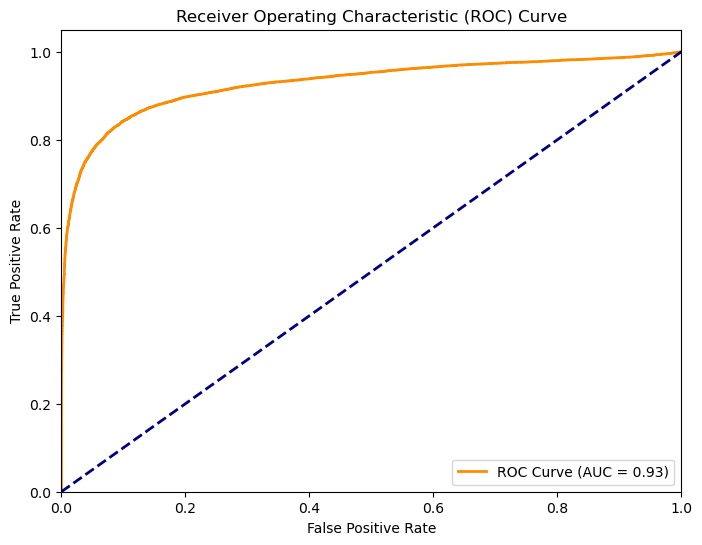

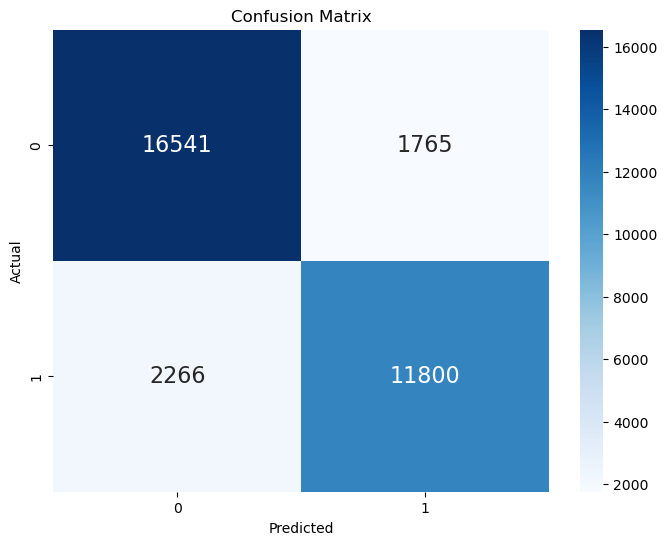

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Make predictions using the trained Logistic Regression model
y_pred = logistic_model.predict(X_test_final)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Convert to pandas Series and map 'Y' to 1 and 'N' to 0
y_test = pd.Series(y_test).map({'Y': 1, 'N': 0})
y_pred = pd.Series(y_pred).map({'Y': 1, 'N': 0})

# Calculate ROC curve and AUC
y_prob = logistic_model.predict_proba(X_test_final)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC: {roc_auc:.2f}')

# Calculate precision-recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)
print(f'Average Precision: {average_precision:.2f}')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


features evaluation

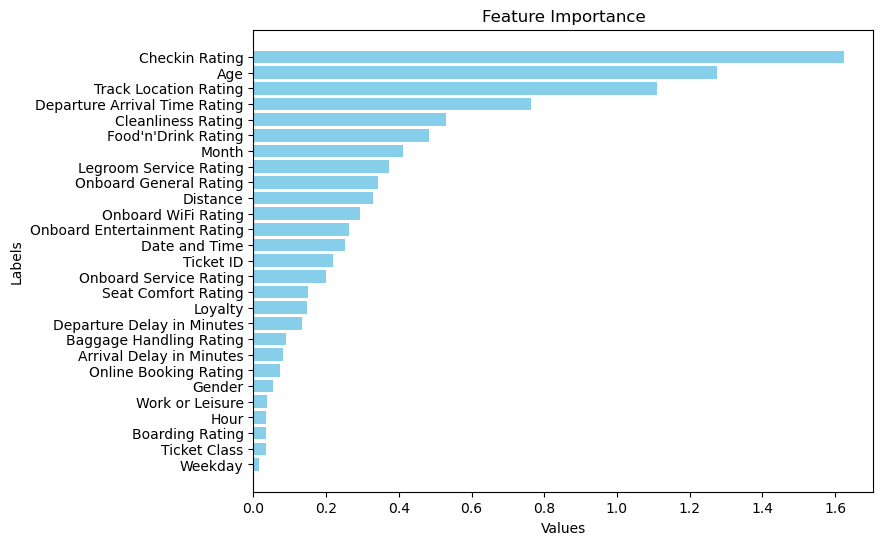

In [58]:
coefficients = np.abs(logistic_model.coef_[0])
feature_names = X.columns
coef_importance = list(zip(feature_names, coefficients))
coef_importance.sort(key=lambda x: x[1], reverse=True)

labels, values = zip(*coef_importance)
plt.figure(figsize=(8, 6))
plt.barh(labels, values, color='skyblue')
plt.xlabel('Values')
plt.ylabel('Labels')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to display the top feature at the top
plt.show()


In [59]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

n_samples = 5000

# Generate two blobs with those centers and two different classe
centers = [(-1, 0), (1, 0)]
X, y = make_blobs(n_samples=n_samples, centers=centers, shuffle=False, random_state=2112)

# Train/Test set definition.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2112)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Display the shapes of the resulting sets
print("Shapes of the split datasets:")
print(f"X_train shape: {X_train_scaled.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test_scaled.shape}, y_test shape: {y_test.shape}")


Shapes of the split datasets:
X_train shape: (3750, 2), y_train shape: (3750,)
X_test shape: (1250, 2), y_test shape: (1250,)


/var/folders/k7/jkh44w1n4jg6nfphrrdf1p380000gn/T/ipykernel_10610/2017802630.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


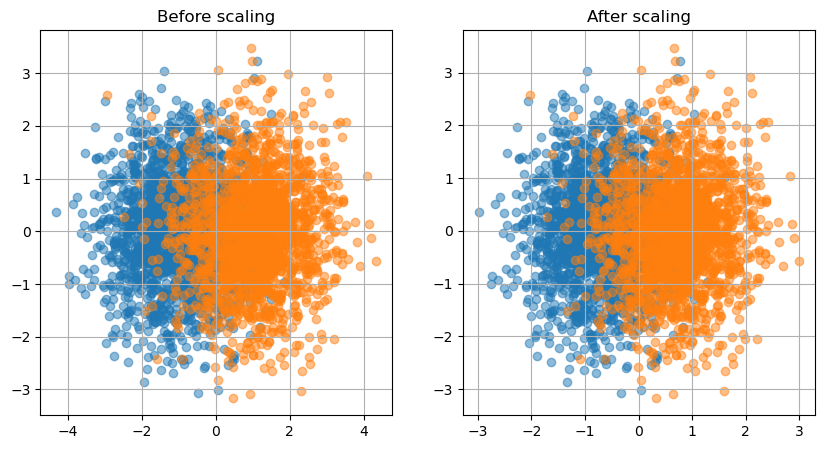

In [60]:
def get_xy(X_set, y_set, y_val):
  x = X_set[y_set == y_val, 0]
  y = X_set[y_set == y_val, 1]
  return x, y

fig, axs = plt.subplots(1,2, figsize=(10,5))

axs[0].scatter(*get_xy(X_train, y_train, 0), alpha = 0.5)
axs[0].scatter(*get_xy(X_train, y_train, 1), alpha = 0.5)
axs[0].set_title('Before scaling')
axs[0].grid()

axs[1].scatter(*get_xy(X_train_scaled, y_train, 0), alpha = 0.5)
axs[1].scatter(*get_xy(X_train_scaled, y_train, 1), alpha = 0.5)
axs[1].set_title('After scaling')
axs[1].grid()

fig.show()